<a href="https://colab.research.google.com/github/parisaagh/AI-HW4/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
import numpy as np

class Node:
    def __init__(self, position, parent=None, g_value=0, h_value=0):
        self.position = position
        self.parent = parent
        self.g_value = g_value
        self.h_value = h_value

    def __lt__(self, other):
        return (self.g_value + self.h_value) < (other.g_value + other.h_value)

def heuristic(current, goal):
    # You need to define your heuristic function here
    return np.sqrt((current[0] - goal[0])**2 + (current[1] - goal[1])**2)

def astar(maze, start, goal):
    open_set = []
    closed_set = set()

    start_node = Node(start)
    goal_node = Node(goal)

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)

        for next_position in get_neighbors(current_node.position, maze):
            if next_position in closed_set:
                continue

            g_value = current_node.g_value + 1
            h_value = heuristic(next_position, goal)
            new_node = Node(next_position, current_node, g_value, h_value)

            if new_node not in open_set:
                heapq.heappush(open_set, new_node)

def greedy_best_first(maze, start, goal):
    open_set = []
    closed_set = set()

    start_node = Node(start)
    goal_node = Node(goal)

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)

        for next_position in get_neighbors(current_node.position, maze):
            if next_position in closed_set:
                continue

            h_value = heuristic(next_position, goal)
            new_node = Node(next_position, current_node, h_value=h_value)

            if new_node not in open_set:
                heapq.heappush(open_set, new_node)

def get_neighbors(position, maze):
    """
    Returns valid neighbors for a given position in the maze.
    """
    row, col = position
    neighbors = []

    # Check left neighbor
    if col > 0 and maze[row][col - 1] == 0:
        neighbors.append((row, col - 1))

    # Check right neighbor
    if col < len(maze[0]) - 1 and maze[row][col + 1] == 0:
        neighbors.append((row, col + 1))

    # Check up neighbor
    if row > 0 and maze[row - 1][col] == 0:
        neighbors.append((row - 1, col))

    # Check down neighbor
    if row < len(maze) - 1 and maze[row + 1][col] == 0:
        neighbors.append((row + 1, col))

    return neighbors
def __lt__(self, other):
    return (self.g_value, self.h_value) < (other.g_value, other.h_value)

# Example usage:
maze = np.array([[0, 0, 0, 0, 0],
                 [0, 1, 1, 0, 0],
                 [0, 0, 0, 1, 0],
                 [0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0]])

start_point = (0, 0)
goal_point = (4, 4)

astar_path = astar(maze, start_point, goal_point)
greedy_path = greedy_best_first(maze, start_point, goal_point)

print("A* Path:", astar_path)
print("Greedy Best-First Path:", greedy_path)


A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Greedy Best-First Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [ ]:
import math
import random

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

def heuristic(current, goal):
    x1, y1 = current
    x2, y2 = goal
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def get_neighbors(position, maze):
    row, col = position
    neighbors = []

    directions = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

    random.shuffle(directions)

    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc

        if 0 <= new_row < len(maze) and 0 <= new_col < len(maze[0]) and maze[new_row][new_col] == 0:
            neighbors.append((new_row, new_col))

    return neighbors

def astar(maze, start, goal):
    start_node = Node(start)
    goal_node = Node(goal)

    open_set = [start_node]
    closed_set = set()

    while open_set:
        current_node = min(open_set, key=lambda x: x.f)
        open_set.remove(current_node)
        closed_set.add(current_node.position)

        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        for next_position in get_neighbors(current_node.position, maze):
            if next_position in closed_set:
                continue

            new_node = Node(next_position, current_node)
            new_node.g = current_node.g + 1
            new_node.h = heuristic(new_node.position, goal_node.position)
            new_node.f = new_node.g + new_node.h

            if new_node not in open_set:
                open_set.append(new_node)

    return None

# Example usage
maze = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start_point = (0, 0)
goal_point = (4, 4)

astar_path = astar(maze, start_point, goal_point)
print("A* Path:", astar_path)


A* Path: [(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (3, 4), (4, 4)]


In [ ]:
import math
import random

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

def heuristic(current, goal):
    x1, y1 = current
    x2, y2 = goal
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def get_neighbors(position, maze):
    row, col = position
    neighbors = []

    directions = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

    random.shuffle(directions)

    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc

        if 0 <= new_row < len(maze) and 0 <= new_col < len(maze[0]) and maze[new_row][new_col] == 0:
            neighbors.append((new_row, new_col))

    return neighbors

def weighted_astar(maze, start, goal, alpha, beta):
    start_node = Node(start)
    goal_node = Node(goal)

    open_set = [start_node]
    closed_set = set()

    while open_set:
        current_node = min(open_set, key=lambda x: x.f)
        open_set.remove(current_node)
        closed_set.add(current_node.position)

        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        for next_position in get_neighbors(current_node.position, maze):
            if next_position in closed_set:
                continue

            new_node = Node(next_position, current_node)
            new_node.g = current_node.g + 1
            new_node.h = heuristic(new_node.position, goal_node.position)
            new_node.f = alpha * new_node.g + beta * new_node.h

            if new_node not in open_set:
                open_set.append(new_node)

    return None

# Example usage for experimenting with different alpha values
maze = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start_point = (0, 0)
goal_point = (4, 4)

alpha_values = [1, 2, 0.5, 0]
beta = 1  # You can adjust beta accordingly

for alpha in alpha_values:
    weighted_astar_path = weighted_astar(maze, start_point, goal_point, alpha, beta)
    print(f"Weighted A* Path (alpha={alpha}, beta={beta}):", weighted_astar_path)


Weighted A* Path (alpha=1, beta=1): [(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (3, 4), (4, 4)]
Weighted A* Path (alpha=2, beta=1): [(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (3, 4), (4, 4)]
Weighted A* Path (alpha=0.5, beta=1): [(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (3, 4), (4, 4)]
Weighted A* Path (alpha=0, beta=1): [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4), (4, 4)]



Weighted A* Path (alpha=1, beta=1):


C:\Users\parsa\AppData\Local\Temp\ipykernel_14320\3494358352.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().get_yaxis().set_ticklabels(['Obstacle', 'Free Space', 'Path'])


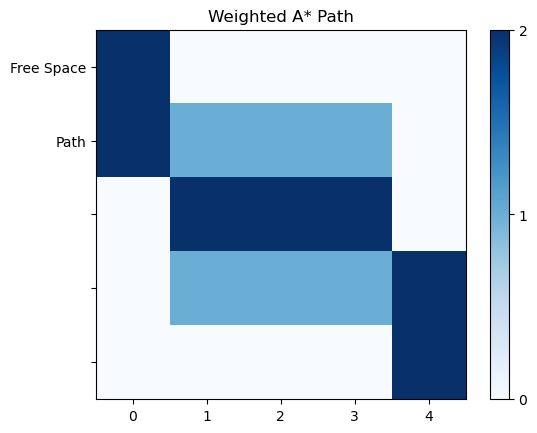


Weighted A* Path (alpha=2, beta=1):


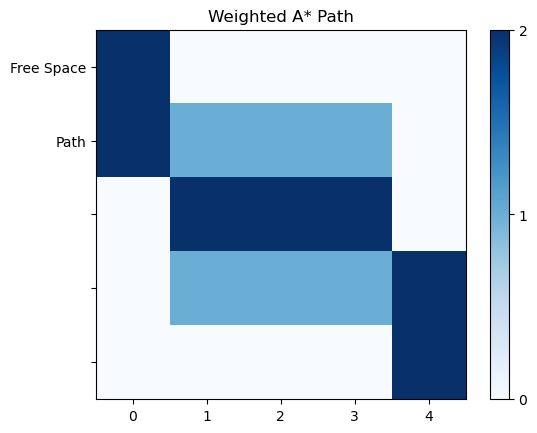


Weighted A* Path (alpha=0.5, beta=1):


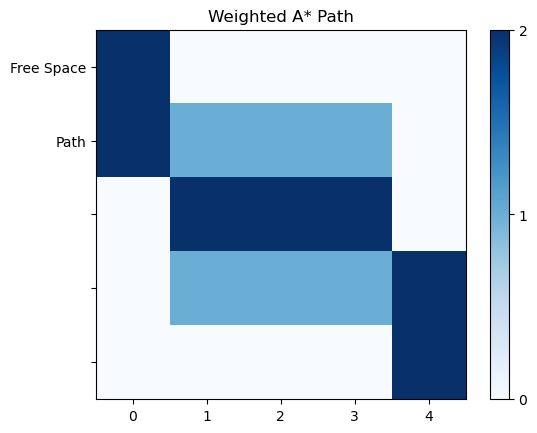


Weighted A* Path (alpha=0, beta=1):


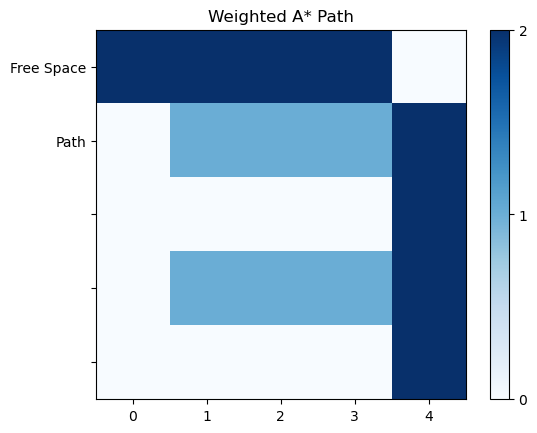

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the path using imshow
def visualize_path(maze, path):
    maze_array = np.array(maze)

    # Mark the path on the maze
    for point in path:
        maze_array[point] = 2  # You can choose any value for marking the path

    # Plot the maze with the marked path
    plt.imshow(maze_array, cmap='Blues', interpolation='nearest', vmin=0, vmax=2)
    plt.title("Weighted A* Path")

    # Customize ticks and tick labels
    plt.colorbar(ticks=[0, 1, 2])
    plt.gca().get_yaxis().set_ticklabels(['Obstacle', 'Free Space', 'Path'])

    plt.show()

# Example usage:
alpha_values = [1, 2, 0.5, 0]
maze = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start_point = (0, 0)
goal_point = (4, 4)

for alpha in alpha_values:
    beta = 1  # You can adjust beta accordingly
    weighted_astar_path = weighted_astar(maze, start_point, goal_point, alpha, beta)

    # Visualization using imshow
    print(f"\nWeighted A* Path (alpha={alpha}, beta={beta}):")
    visualize_path(maze, weighted_astar_path)
